# Lab2 ARIMA Model and Prediction

## Task 1. Stationary of AR models

### 1.1 Generate four time series according to the above AR models, one for each. Draw a line plot for each time series.

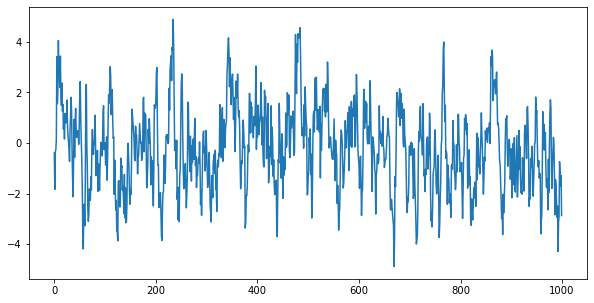

In [3]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
ar_1 = np.array([1,-0.8])
ma = np.array([1])
ar_object1 = ArmaProcess(ar_1, ma)
simulated_data_1 = ar_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plt.savefig('figure/1_1_1.png')

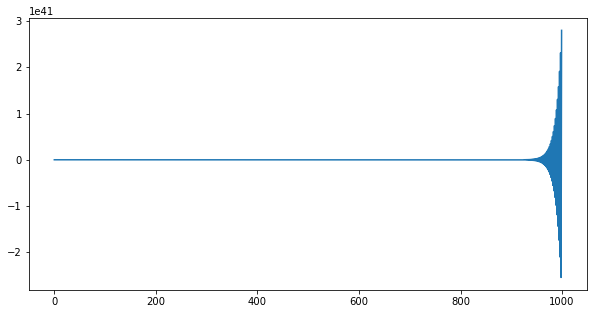

In [4]:
ar_2 = np.array([1,1.1])
ma = np.array([1])
ar_object2 = ArmaProcess(ar_2, ma)
simulated_data_2 = ar_object2.generate_sample(nsample=1000)
#print(simulated_data_2)
plt.plot(simulated_data_2)
plt.savefig('figure/1_1_2.png')

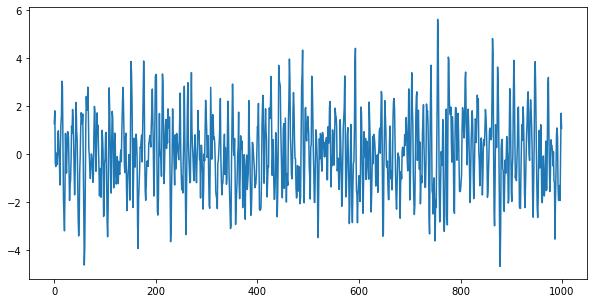

In [5]:
ar_3 = np.array([1 ,-1, 0.5])
ma = np.array([1])
ar_object3 = ArmaProcess(ar_3, ma)
simulated_data_3 = ar_object3.generate_sample(nsample=1000)
#print(simulated_data_2)
plt.plot(simulated_data_3)
plt.savefig('figure/1_1_3.png')

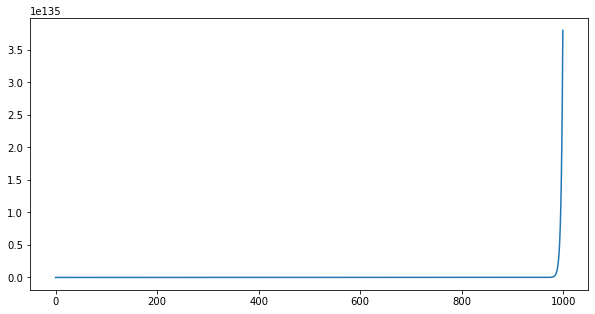

In [6]:
ar_4 = np.array([1 ,-1, -0.5])
ma = np.array([1])
ar_object4 = ArmaProcess(ar_4, ma)
simulated_data_4 = ar_object4.generate_sample(nsample=1000)
#print(simulated_data_2)
plt.plot(simulated_data_4)
plt.savefig('figure/1_1_4.png')

### 1.2 Judge whether each time series is stationary or not, by visual inspection.

By looking at line plots, series 1 and series 3 are stationary, while series 2 and series 4 are not stationary.

### 1.3 Judge whether each time series is stationary or not, by its auto-regressive coefficient values.

For p = 1: -1 < coefficient < 1, then the series is stationary.
So series 1 is stationary, series 2 is not stationary. 

For p = 2: −1 < ϕ2 < 1 , ϕ2 + ϕ1 < 1 , ϕ2 − ϕ1 < 1, then the seires is stationary. So series 3 is stationary, series 4 is not stationary. 

### 1.4 Call the following statsmodel function to judge if each AR process is stationary.

In [7]:
print(ar_object1.isstationary, ar_object2.isstationary, ar_object3.isstationary, ar_object4.isstationary)

True False True False


### 1.5 Use the unit-root based Augmented Dickey-Fuller (ADF) test to check if each time series generated by the AR models is stationary or not. Do the results match your visual inspection?

In [8]:
from statsmodels.tsa.stattools import adfuller
result_1 = adfuller(simulated_data_1, autolag='AIC')
print('ADF Statistic: %f' % result_1[0])
print('p-value: %f' % result_1[1])
print('Critical Values:')
for key, value in result_1[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.617882
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [9]:
result_2 = adfuller(simulated_data_2, autolag='AIC')
print('ADF Statistic: %f' % result_2[0])
print('p-value: %f' % result_2[1])
print('Critical Values:')
for key, value in result_2[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -133464563123240384.000000
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [10]:
result_3 = adfuller(simulated_data_3, autolag='AIC')
print('ADF Statistic: %f' % result_3[0])
print('p-value: %f' % result_3[1])
print('Critical Values:')
for key, value in result_3[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -20.151969
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [11]:
result_4 = adfuller(simulated_data_4, autolag='AIC')
print('ADF Statistic: %f' % result_4[0])
print('p-value: %f' % result_4[1])
print('Critical Values:')
for key, value in result_4[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 123541834111717344.000000
p-value: 1.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


## Task 2: ACF, PACF of AR models

### 2.1 Generate four time series according to the above AR models, one for each. Are all of them stationary? Draw a line plot for each time series.

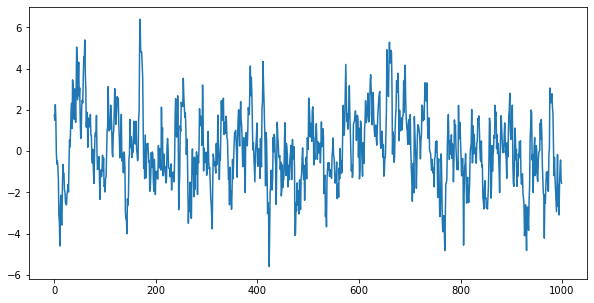

In [12]:
ar_2_1 = np.array([1,-0.8])
ma = np.array([1])
ar_object2_1 = ArmaProcess(ar_2_1, ma)
simulated_data2_1 = ar_object2_1.generate_sample(nsample=1000)
plt.plot(simulated_data2_1)
plt.savefig('figure/2_1_1.png')

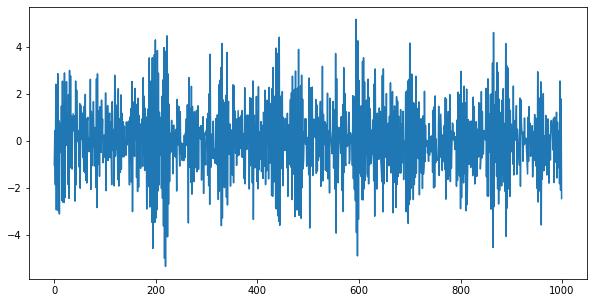

In [13]:
ar_2_2 = np.array([1,0.8])
ma = np.array([1])
ar_object2_2 = ArmaProcess(ar_2_2, ma)
simulated_data2_2 = ar_object2_2.generate_sample(nsample=1000)
plt.plot(simulated_data2_2)
plt.savefig('figure/2_1_2.png')

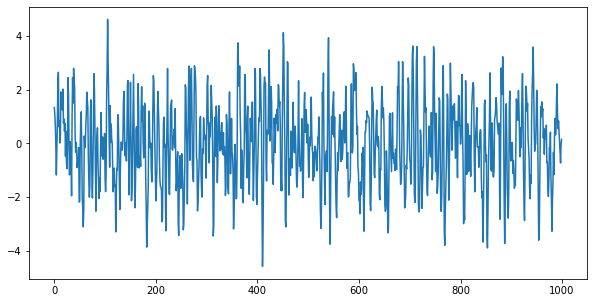

In [14]:
ar_2_3 = np.array([1,-1, 0.5])
ma = np.array([1])
ar_object2_3 = ArmaProcess(ar_2_3, ma)
simulated_data2_3 = ar_object2_3.generate_sample(nsample=1000)
plt.plot(simulated_data2_3)
plt.savefig('figure/2_1_3.png')

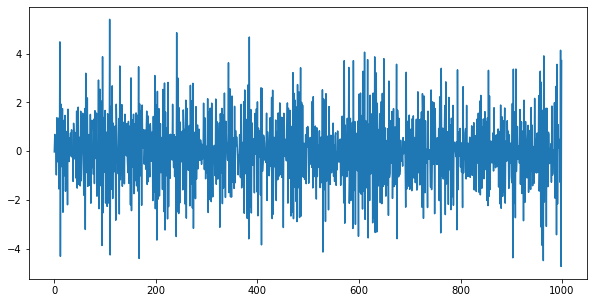

In [15]:
ar_2_4 = np.array([1,1,0.5])
ma = np.array([1])
ar_object2_4 = ArmaProcess(ar_2_4, ma)
simulated_data2_4 = ar_object2_4.generate_sample(nsample=1000)
plt.plot(simulated_data2_4)
plt.savefig('figure/2_1_4.png')

### 2.2 Draw histogram, density plot, and box plot for each time series with 1000 data points. Are there any outliers? Why?

In [16]:
import pandas as pd
def histo_den_box(data):
    plt.figure()
    pd.Series(data).plot.hist(title = 'Histogram')
    plt.figure()
    pd.Series(data).plot.density()
    # Box plot
    plt.figure()
    pd.Series(data).plot.box(title = 'Box plot')

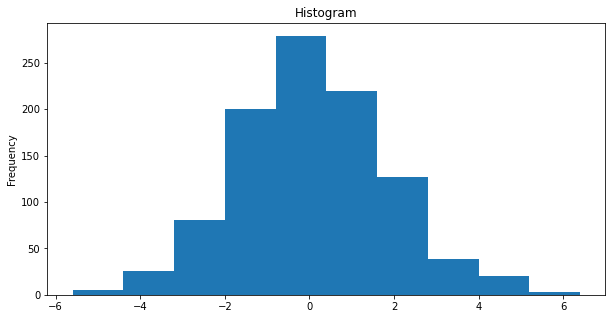

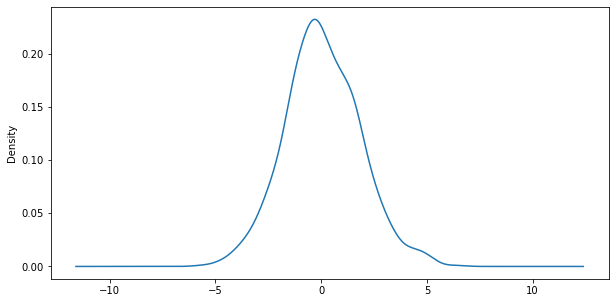

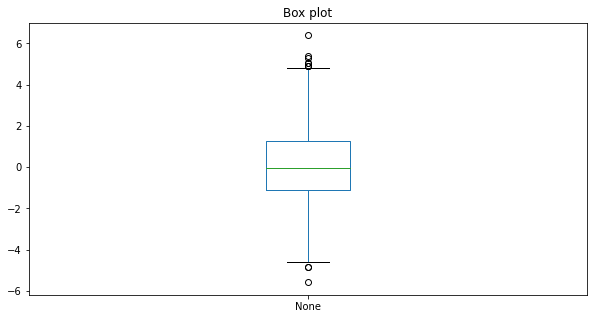

In [17]:
histo_den_box(simulated_data2_1)

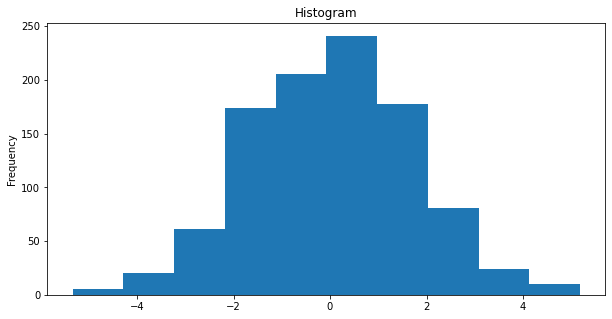

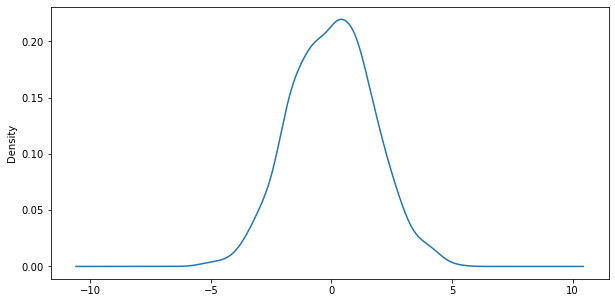

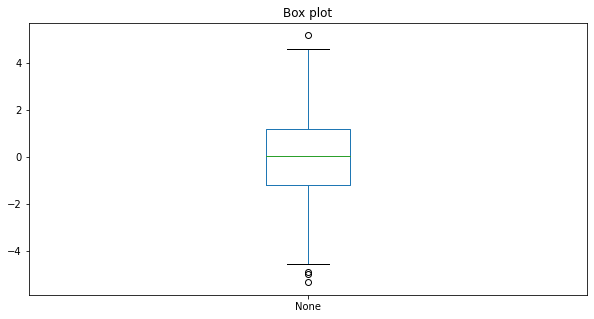

In [18]:
histo_den_box(simulated_data2_2)

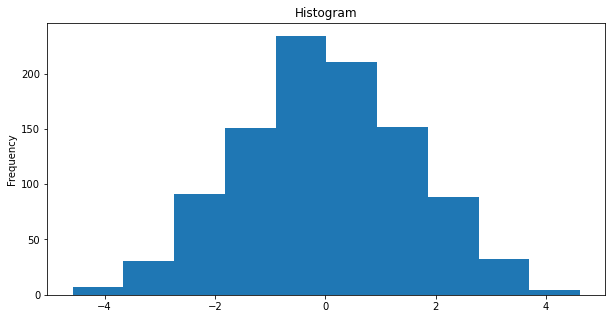

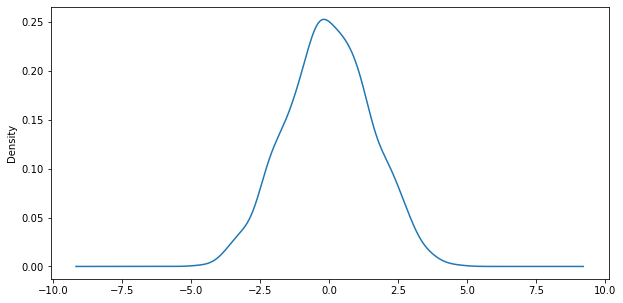

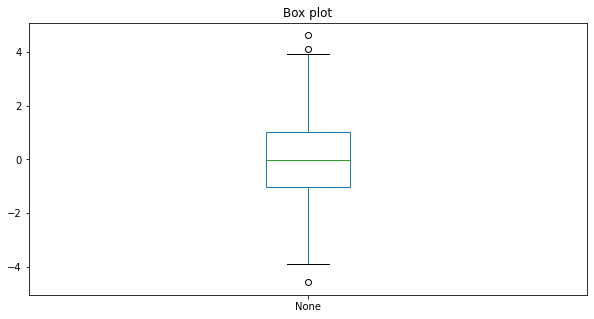

In [19]:
histo_den_box(simulated_data2_3)

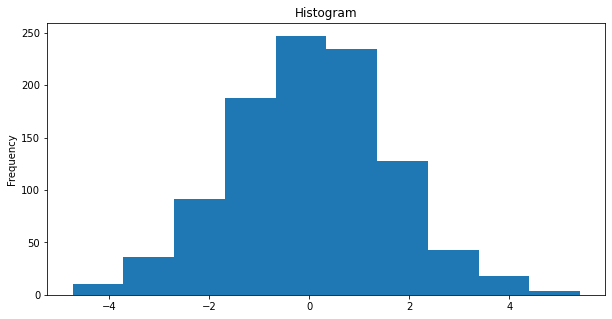

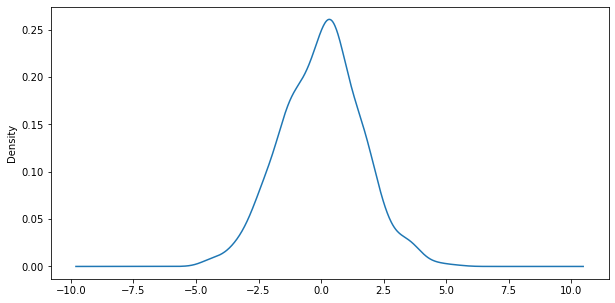

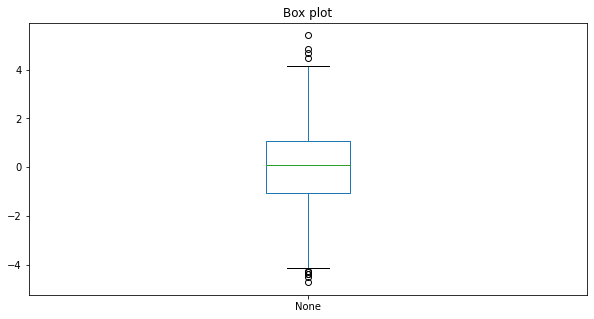

In [20]:
histo_den_box(simulated_data2_4)

There are some outliers. According to box plot, because of gaussian noise. 

### 2.3 Draw lag-1 and lag-2 plots for each time series. Do you observe any auto-correlation from the lag plots?

In [21]:
def lag_1_2(data):
    plt.figure()
    series = pd.Series(data)
    pd.plotting.lag_plot(series, lag=1)
    plt.figure()
    pd.plotting.lag_plot(series, lag=2)

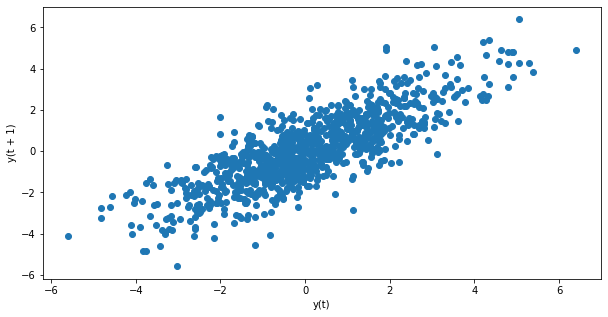

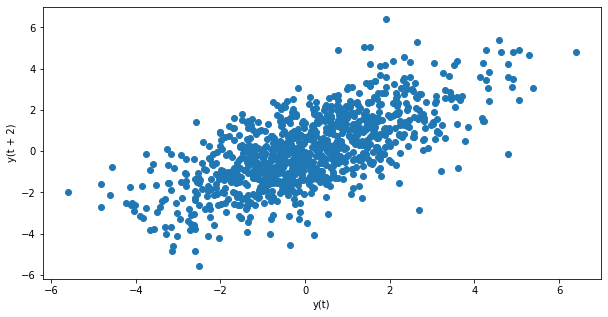

In [22]:
lag_1_2(simulated_data2_1)

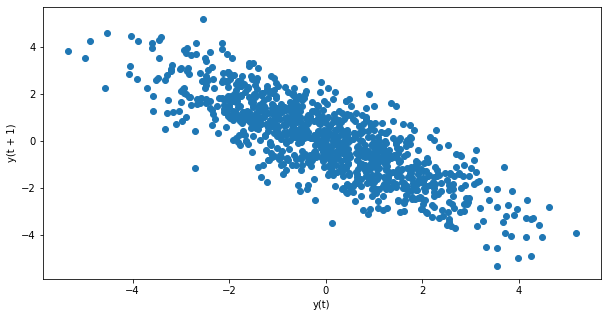

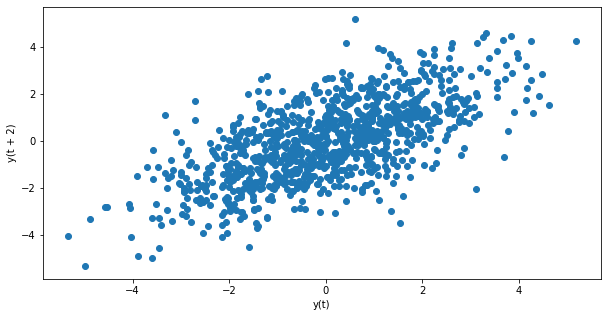

In [23]:
lag_1_2(simulated_data2_2)

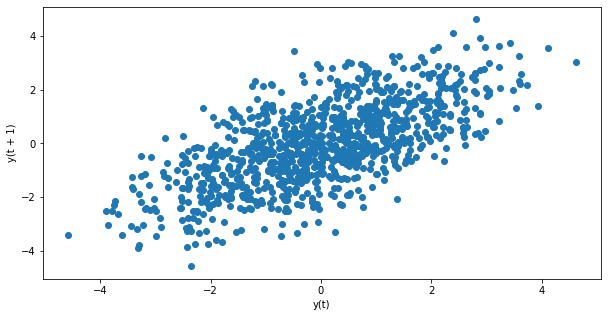

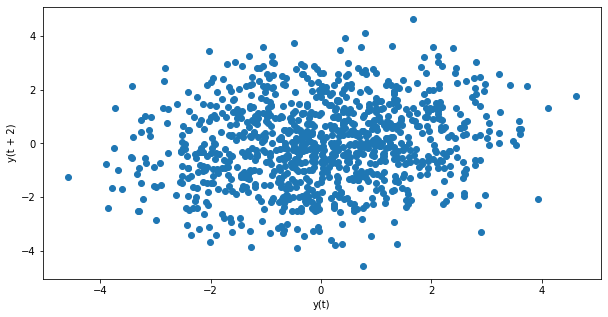

In [24]:
lag_1_2(simulated_data2_3)

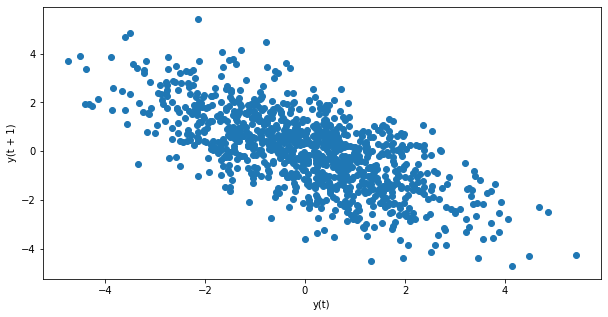

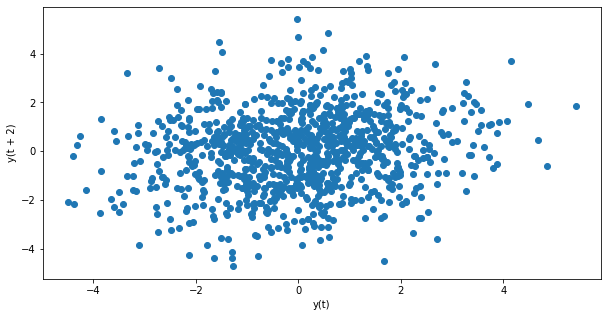

In [25]:
lag_1_2(simulated_data2_4)

### 2.4 Draw ACF graph for each time series.

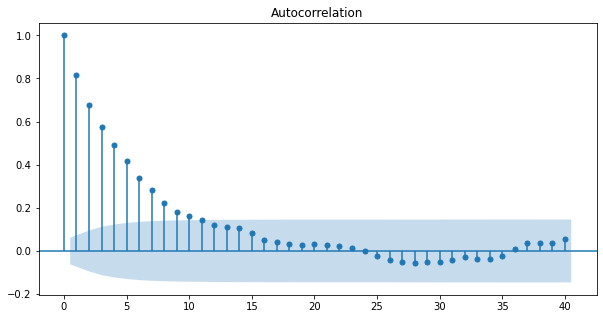

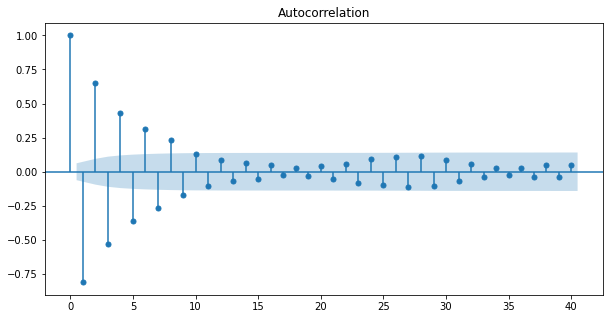

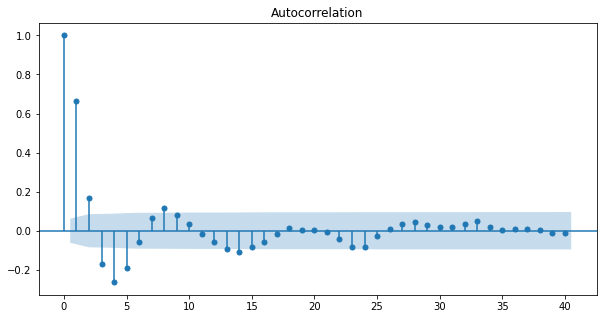

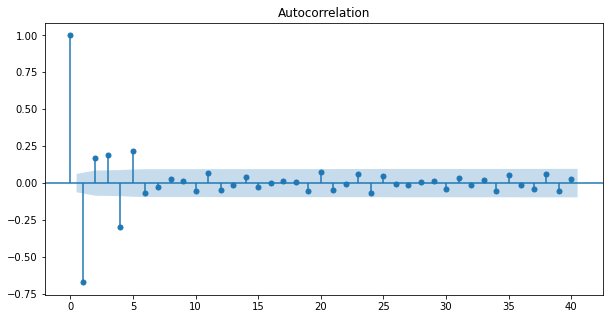

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pd.Series(simulated_data2_1), lags=40)
plt.show()
plot_acf(pd.Series(simulated_data2_2), lags=40)
plt.show()
plot_acf(pd.Series(simulated_data2_3), lags=40)
plt.show()
plot_acf(pd.Series(simulated_data2_4), lags=40)
plt.show()

### 2.5 Draw PACF graph for each time series.

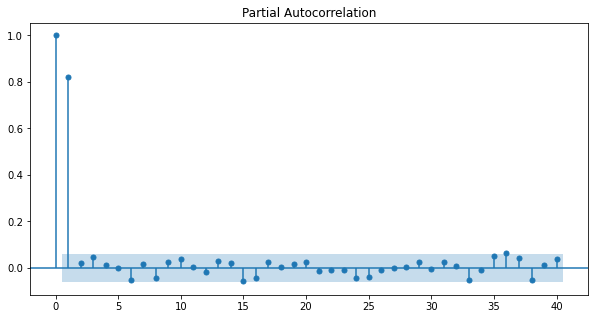

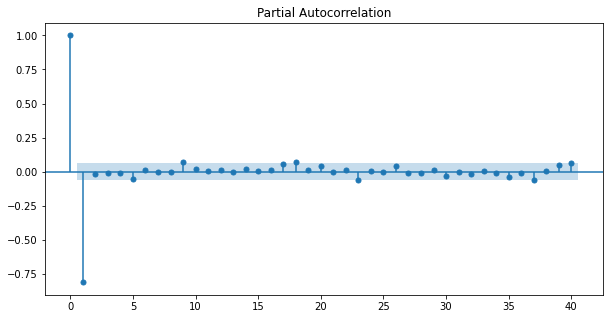

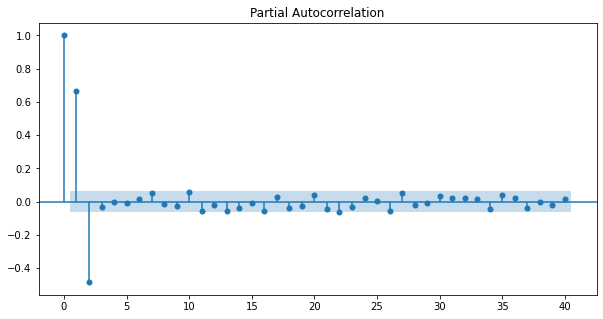

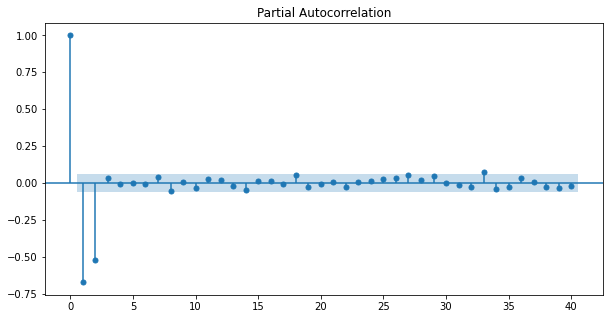

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(pd.Series(simulated_data2_1), lags=40)
plt.show()
plot_pacf(pd.Series(simulated_data2_2), lags=40)
plt.show()
plot_pacf(pd.Series(simulated_data2_3), lags=40)
plt.show()
plot_pacf(pd.Series(simulated_data2_4), lags=40)
plt.show()

## Task 3: Invertibility, ACF, PACF of MA models

### 3.1 Generate four time series according to the above MA(q) models, one for each. Draw a line plot for each time series.

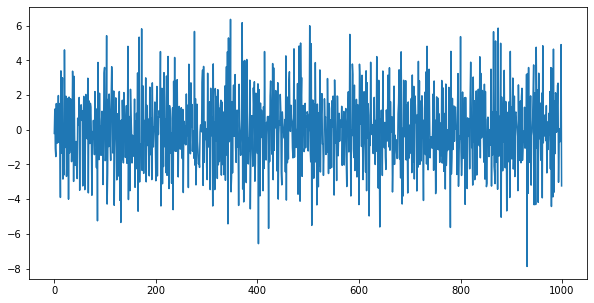

In [31]:
ar = np.array([1])
ma1 = np.array([1, -2])
ma2 = np.array([1, -0.5])
ma3 = np.array([1, -0.8, 0.64])
ma4 = np.array([1, -1.25, 1.5625])

MA_object1 = ArmaProcess(ar, ma1)
MA_object2 = ArmaProcess(ar, ma2)
MA_object3 = ArmaProcess(ar, ma3)
MA_object4 = ArmaProcess(ar, ma4)

simulated_data_1 = MA_object1.generate_sample(nsample=1000)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
simulated_data_3 = MA_object3.generate_sample(nsample=1000)
simulated_data_4 = MA_object4.generate_sample(nsample=1000)

plt.plot(simulated_data_1)

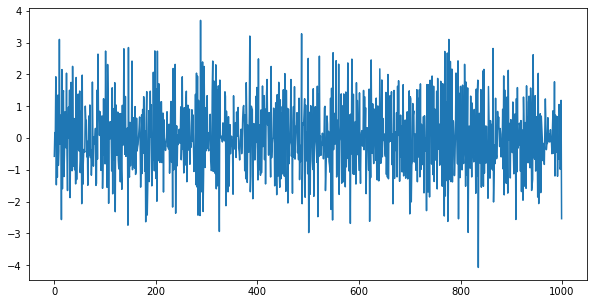

In [32]:
plt.plot(simulated_data_2)

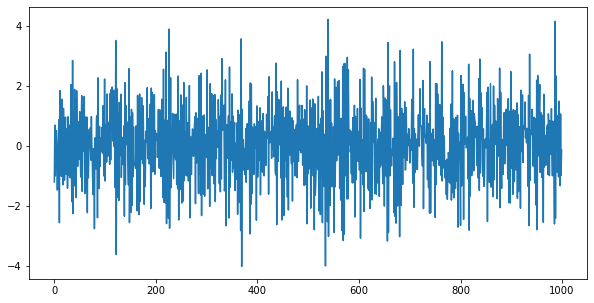

In [33]:
plt.plot(simulated_data_3)

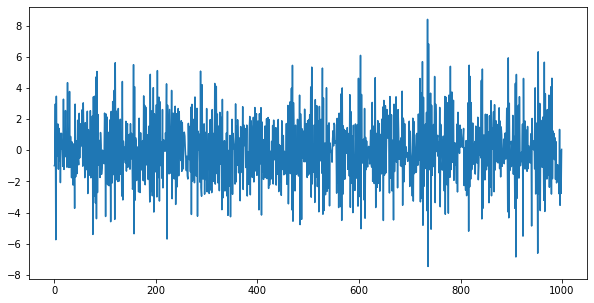

In [34]:
plt.plot(simulated_data_4)

### 3.2 Judge whether each time series is invertible or not, by visual inspection.

### 3.3 Judge whether each time series is invertible or not, by its auto-correlation coefficient values.